# Loading Test image


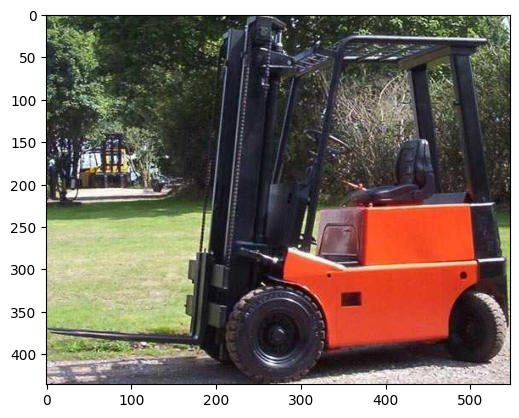

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import csv
import numpy as np
import os
img = cv2.imread('1Z2J2ECZ7K49_jpg.rf.d2fc14830de2627001b057645785cab8.jpg')
img_t = img[32:468,20:567]
#xmin,ymin,xmax,ymax
#20,32,567,468
img_rgb = cv2.cvtColor(img_t, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

convert image

Image shape: (128, 64)
Image dtype: uint8


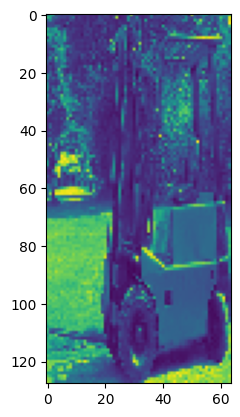

In [8]:
# Convert the original image to gray scale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#20,32,567,468


# Specify the parameters for our HOG descriptor
img_s=cv2.resize(img_gray, (64, 128), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_s)
print("Image shape:", img_s.shape)
print("Image dtype:", img_s.dtype)


Don't use this one

In [9]:
# win_size = img_s.shape
# print(win_size)
# cell_size = (8, 8)
# block_size = (16, 16)
# block_stride = (8, 8)
# num_bins = 18

# # Set the parameters of the HOG descriptor using the variables defined above
# hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
# hog_descriptor = hog.compute(img_s)
# print(len(hog_descriptor))

Use This one

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          4.84925604 ...  6.24497747  0.
   0.        ]
 [ 0.          9.89830041  0.         ...  0.         13.15934372
   0.        ]
 ...
 [ 0.         11.1865952   0.         ...  0.          7.34306026
   0.        ]
 [ 0.          0.          5.68904209 ...  3.66012836  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


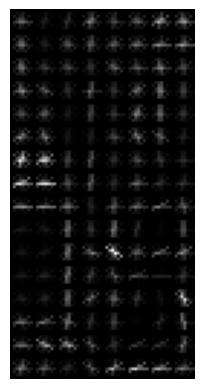

In [10]:
fd, hog_image = hog(img_s, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
print(hog_image)

Generate HOG list for training

In [ ]:
#Clear folders

for entry in os.scandir("people"):
    if entry.name.endswith(".txt"):
        os.remove(entry.path)
for entry in os.scandir("notpeople"):
    if entry.name.endswith(".txt"):
        os.remove(entry.path)
for entry in os.scandir("trainHOG"):
    if entry.name.endswith(".txt"):
        os.remove(entry.path)

In [ ]:

numberoftrainingimages=1000
num=0
with open('train/_annotations.csv', mode ='r') as file:    
       csvFile = csv.DictReader(file)
       
       for lines in csvFile:
            num=num+1
            if num>numberoftrainingimages:
                  break
            # print(num)
            img = cv2.imread("train/"+lines["filename"])
            crop_img = img[int(lines["ymin"]):int(lines["ymax"]), int(lines["xmin"]):int(lines["xmax"])]
            img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
            img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
            img_s=cv2.resize(img_gray, (64, 128), interpolation=cv2.INTER_LINEAR)
            fd, hog_image = hog(img_s, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
            if lines["class"].lower() == "person" or lines["class"].lower() == "pedestrians":
                  # print(num)
                  np.savetxt("people/"+str(num)+"_"+lines["filename"]+".txt", np.array(hog_image), delimiter=',')
            else:
                  # print(num)
                  np.savetxt("notpeople/"+str(num)+"_"+lines["filename"]+".txt", np.array(hog_image), delimiter=',')

extract HOG from folder text files


In [13]:

def count_files(directory):
    return sum(1 for item in os.listdir(directory) if os.path.isfile(os.path.join(directory, item)))

print(count_files("people"))
print(count_files("notpeople"))

for entry in os.scandir("people"):
    if entry.name.endswith(".txt"):
        print(entry.path)
        print(np.loadtxt(entry.path, delimiter=','))
for entry in os.scandir("notpeople"):
    if entry.name.endswith(".txt"):
        print(entry.path)
        print(np.loadtxt(entry.path, delimiter=','))

446
554
people\100_2010_002400_jpg.rf.28673d065ba9aa369b3444dd0777dfbe.jpg.txt
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.03493856 ...  0.03493856  0.
   0.        ]
 [ 0.          0.17677669  0.         ...  0.          0.04419417
   0.        ]
 ...
 [ 0.          3.31922813  0.         ...  0.         17.36314011
   0.        ]
 [ 0.          0.          4.42463493 ...  0.03493856  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
people\102_O8OEYK11CI5G_jpg.rf.78862968c6e2b8d1d9e099333b78d2be.jpg.txt
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          2.2543714  ...  9.74419022  0.
   0.        ]
 [ 0.          4.53856373  0.         ...  0.         10.98805404
   0.        ]
 ...
 [ 0.          5.06882584  0.         ...  0.          1.66392869
   0.        ]
 [ 0.          0.          1.12129295 ...  0.4505159   0.
   0.        ]
 [ 

Generate Tester HOGS

In [14]:
numberoftestingimages=100
num=0
with open('test/_annotations.csv', mode ='r') as file:    
       csvFile = csv.DictReader(file)
       
       for lines in csvFile:
            num=num+1
            if num>numberoftrainingimages:
                  break
            # print(num)
            img = cv2.imread("test/"+lines["filename"])
            crop_img = img[int(lines["ymin"]):int(lines["ymax"]), int(lines["xmin"]):int(lines["xmax"])]
            img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
            img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
            img_s=cv2.resize(img_gray, (64, 128), interpolation=cv2.INTER_LINEAR)
            fd, hog_image = hog(img_s, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
            if lines["class"].lower() == "person" or lines["class"].lower() == "pedestrians":
                  # print(num)
                  np.savetxt("trainHOG/"+str(num)+"_"+lines["filename"]+"T.txt", np.array(hog_image), delimiter=',')
            else:
                  # print(num)
                  np.savetxt("trainHOG/"+str(num)+"_"+lines["filename"]+"F.txt", np.array(hog_image), delimiter=',')